CHAPTER 10 - SIMPLE LINEAR REGRESSION
=====

By Takeshi Vang
-----

What does a Simple Linear Regression Model do?
------
#### It models the relationship between two varibles to make estimates or evalute trends.


In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds') 

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Pearson Correlation Coeffcient (r-value)
----
- Measures the type and strength of linear correlation between two varibles
- r-value between (1.0 to -1.0)
- Close to 1.0, it shows a strong positive correlation
- Close to -1.0, it shows a strong negative coreelation
- Close to 0.0m it shows no correlation
- Detects only linear relationships

In [4]:
data.corr().head(7)

C:\Users\kashkash\AppData\Local\Temp\ipykernel_28984\2426653550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().head(7)


,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


C:\Users\kashkash\AppData\Local\Temp\ipykernel_28984\3002578427.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap = 'Greens', cbar=False, fmt=f'.3f')


<Axes: >

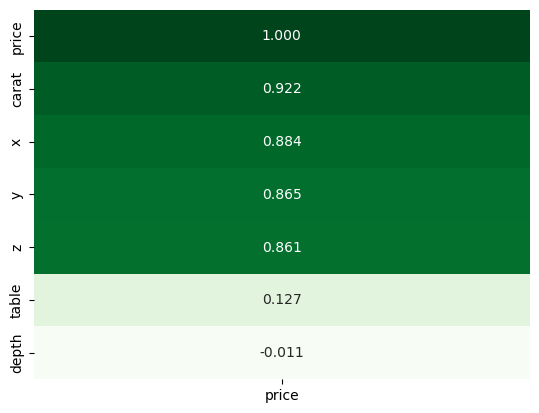

In [5]:
sns.heatmap(data=data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap = 'Greens', cbar=False, fmt=f'.3f')

Procedures for Creating and Using a Regression Model
----
1. Identifying the dependent and independent varibles.
2. Split the dataset into sets
3. Train the model using training set.
4. Test the model using the testing set.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data[['carat']], data[['price']], test_size = .3, random_state = 20)

In [8]:
model = LinearRegression()
display(model)

LinearRegression()

In [9]:
model.fit(x_train,y_train)

LinearRegression()

In [10]:
model.score(x_test, y_test)

0.8504107786474794

In [11]:
y_predicted = model.predict(x_test)
display(y_predicted)

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
predicted_price = pd.DataFrame(data=y_predicted, columns = ['predicted_price'])
predicted_price.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
combinedvalues = predicted_price.join([y_test.reset_index(drop=True), x_test.reset_index(drop=True)])
combinedvalues.head()

,predicted_price,price,carat
0,9540.641914,8674,1.52
1,1940.075433,1637,0.54
2,3180.984246,2657,0.70
3,2327.859437,1838,0.59
4,4421.893059,2980,0.86


In [14]:
meltedvalues = pd.melt(combinedvalues, id_vars =['carat'], value_vars = ['price', 'predicted_price'], var_name = 'price_type', value_name = 'price_value')
display(meltedvalues)

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


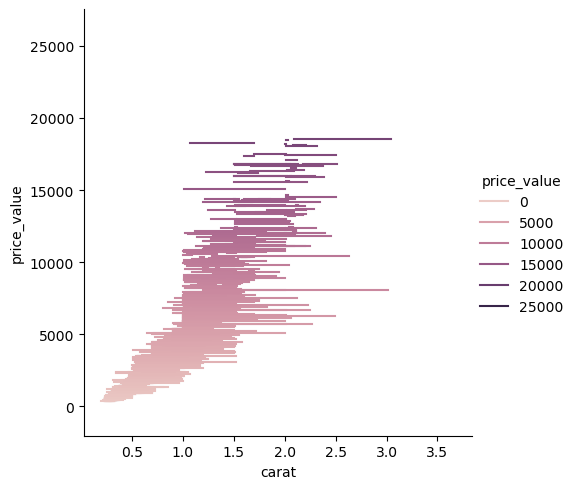

In [19]:
sns.relplot(data = meltedvalues, kind = 'line', x = 'carat', y = 'price_value', hue = 'price_value', errorbar = ('ci', 0))

Regression line equation is **y=mx+b**, where...
-----
- y is the **dependent variable**
- m is the **slope of the line**
- x is the **independent variable**
- b is the **Y-intercept**

In [ ]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [22]:
lr = LinearRegression()
predicted = lr.fit(X,y)


In [26]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')


The slope is [7756.42561797] and the y-intercept is -2256.360580045441


In [27]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.360580045441


In [31]:
carats = 0.7
bf_b = carats * m
af_b = float(bf_b + b)
print(f'The pridicted price for a {carats} carat diamond is ${af_b:,.2f}')

The pridicted price for a 0.7 carat diamond is $3,173.14


In [32]:
carats = 0.54
bf_b = carats * m
af_b = float(bf_b + b)
print(f'The pridicted price for a {carats} carat diamond is ${af_b:,.2f}')

The pridicted price for a 0.54 carat diamond is $1,932.11


Yes, the estimates for both are very close to each as they are only off by a couple tens.